## Telco Customer Churn Prediction

### Data Visualization Notebook

In [1]:
import pandas as pd
from src.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

We apply the same preprocessing steps shown in [data_exploration.ipynb](data_exploration.ipynb)

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.loc[df["tenure"] == 0, "TotalCharges"] = 0

In [5]:
df['HasInternet'] = ~df['OnlineBackup'].isin(['No internet service'])
df['automatic_pay'] = df['PaymentMethod'].isin(['Bank transfer (automatic)','Credit card (automatic)'])

In [6]:
df = mapping(df, YES_NO, YES_NO_MAPPING)

In [7]:
df['gender'] = df['gender'].map({'Male' : 1, 'Female' : 0})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service' : 0, 'No' : 1, 'Yes' : 2})
df['Contract'] = df['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})

In [8]:
df = mapping(df, INTERNET_VARS, INTERNET_VARS_MAPPING)

In [9]:
df = dummies(df, DUMMIES_VARS, TO_DROP)

In [10]:
df = mapping(df, TRUE_FALSE, TRUE_FALSE_MAPPING)

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int64  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   int64  
 3   Dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   MultipleLines              7043 non-null   int64  
 7   OnlineSecurity             7043 non-null   int64  
 8   OnlineBackup               7043 non-null   int64  
 9   DeviceProtection           7043 non-null   int64  
 10  TechSupport                7043 non-null   int64  
 11  StreamingTV                7043 non-null   int64  
 12  StreamingMovies            7043 non-null   int64  
 13  Contract                   7043 non-null   int64

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,HasInternet,automatic_pay,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,1
1,1,0,0,0,34,1,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,1,0,1,0,0,0,0
2,1,0,0,0,2,1,1,1,1,0,0,0,0,0,1,53.85,108.15,1,1,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,1,1,1,0,1,0,0
4,0,0,0,0,2,1,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,0,1


In [14]:
correlation_matrix = df.corr(numeric_only=True)

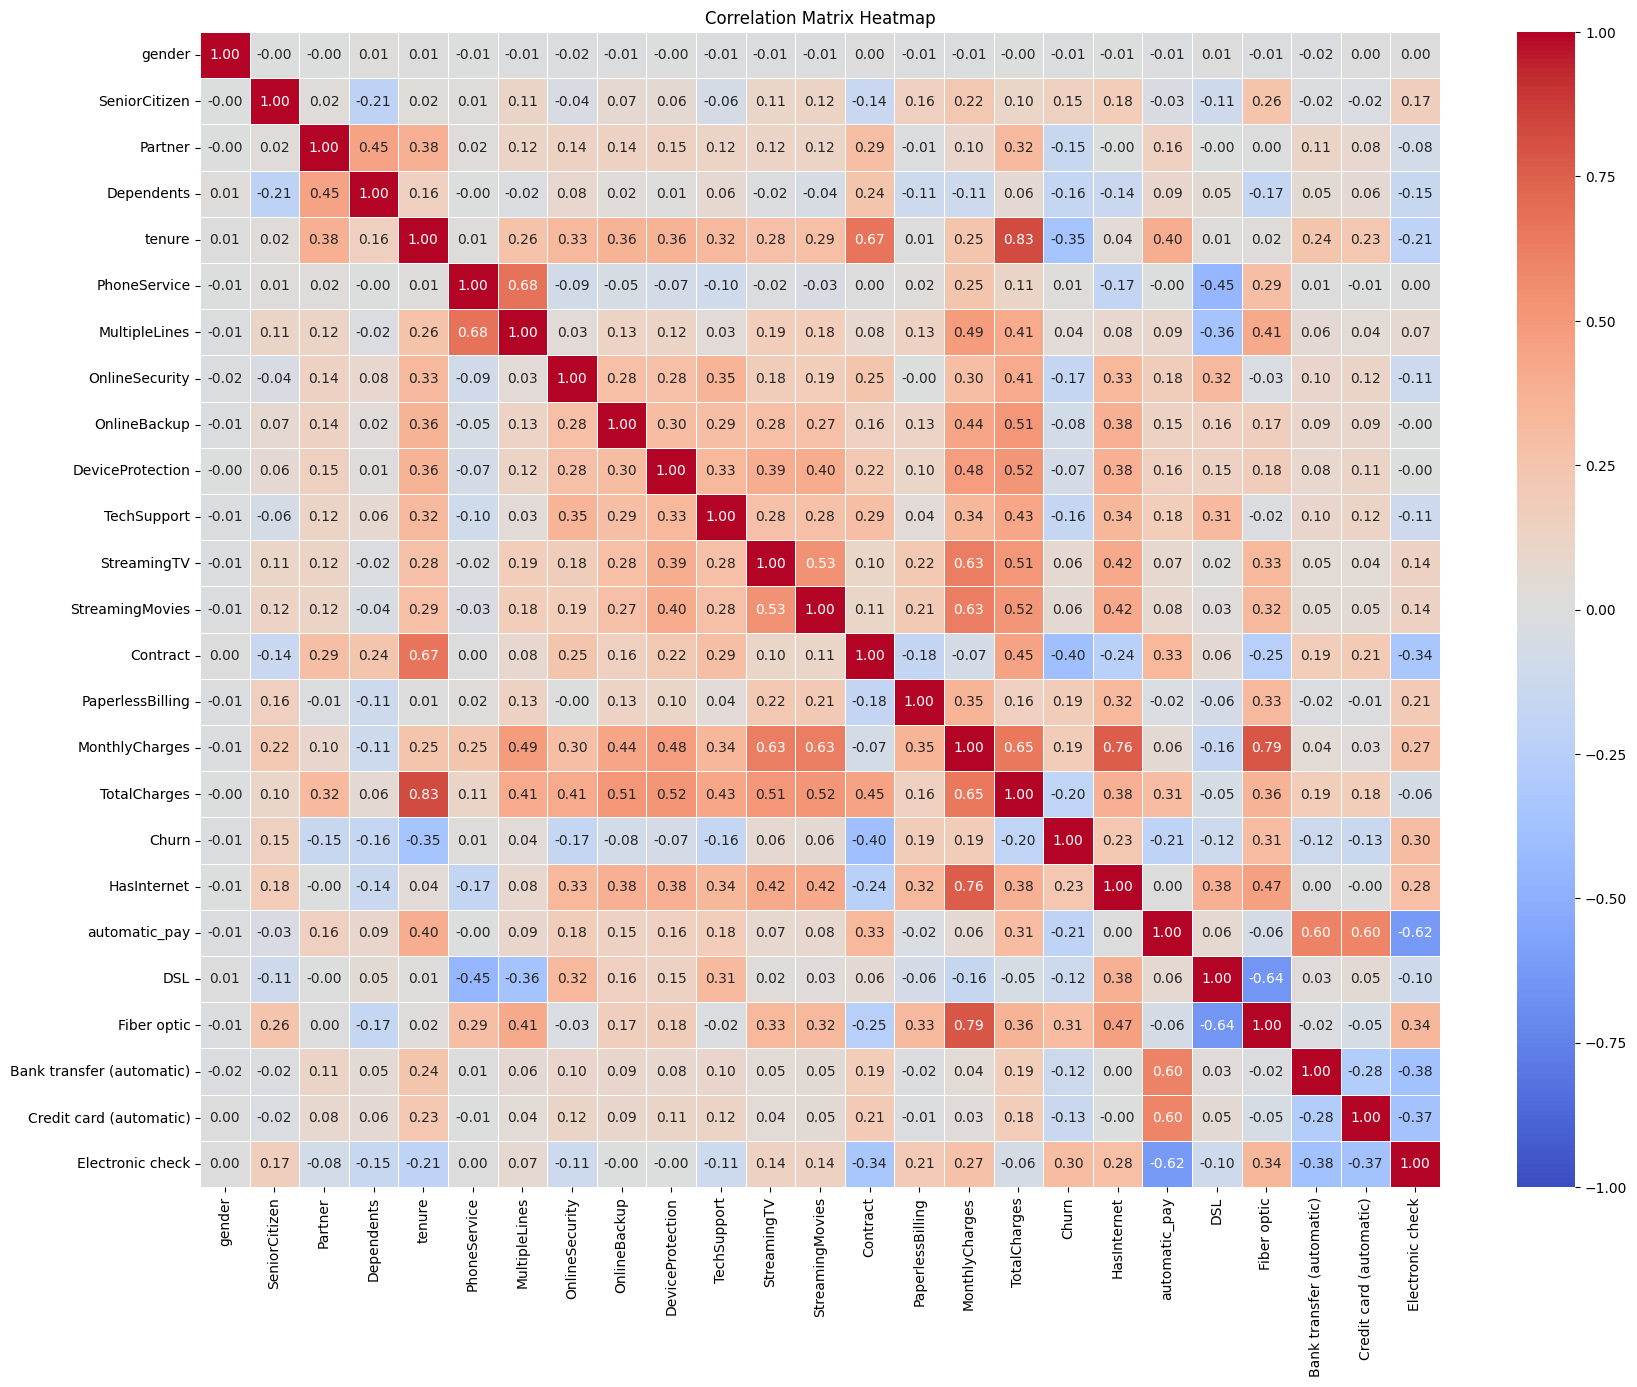

In [17]:
plt.figure(figsize=(20, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmax=1, vmin=-1)
plt.title('Correlation Matrix Heatmap')
plt.show()

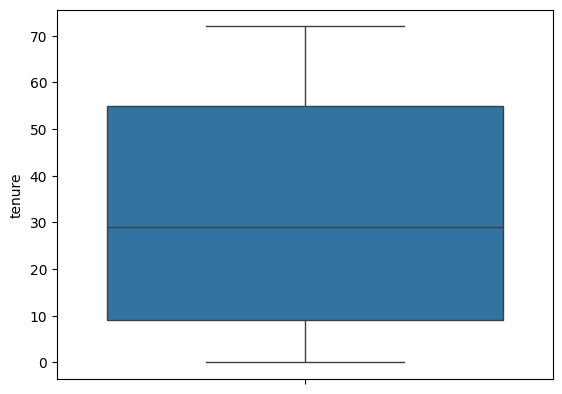

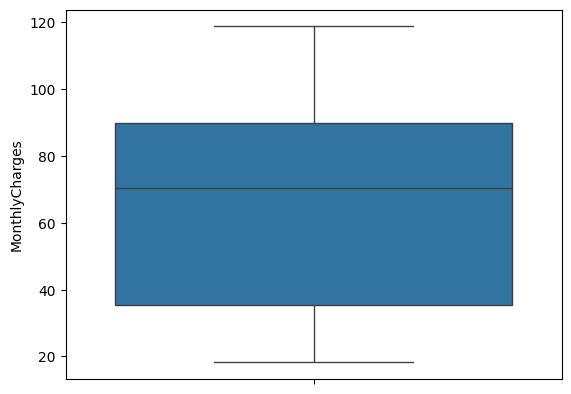

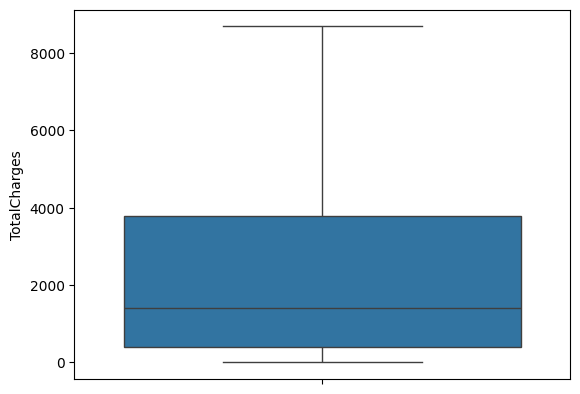

In [23]:
sns.boxplot(y=df["tenure"])
plt.show()

sns.boxplot(y=df["MonthlyCharges"])
plt.show()

sns.boxplot(y=df["TotalCharges"])
plt.show()